<a href="https://colab.research.google.com/github/NandanaSMalu/Automated-review-rating-system/blob/main/Automated_Review_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
import random

# Set global random seed
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

## **LOAD DATASETS**

In [4]:

reviews_df = pd.read_csv("/content/Reviews.csv")
reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
flipkart_df = pd.read_csv("/content/flipkart_product.csv", encoding="ISO-8859-1")
flipkart_df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


**Standardize column names for Flipkart**

In [5]:
flipkart_df = flipkart_df.rename(columns={
    "Review": "Summary",
    "Summary": "Text",
    "Rate": "Score"
})

In [6]:
# Select relevant columns from Amazon reviews
amazon_df = reviews_df[["Text", "Summary", "Score"]]

# Select relevant columns from Flipkart
flipkart_df = flipkart_df[["Text", "Summary", "Score"]]

### **MERGE THE DATASETS**

In [7]:
merged_df = pd.concat([amazon_df, flipkart_df], ignore_index=True)
merged_df

,Text,Summary,Score
0,I have bought several of the Vitality canned d...,Good Quality Dog Food,5
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,1
2,This is a confection that has been around a fe...,"""Delight"" says it all",4
3,If you are looking for the secret ingredient i...,Cough Medicine,2
4,Great taffy at a great price. There was a wid...,Great taffy,5
...,...,...,...
758323,Thanks,Terrific,5
758324,Good,Terrific,5
758325,Super,Just wow!,5
758326,Good,Worth the money,4


In [8]:
import csv
# Save merged dataset
merged_df.to_csv("/content/merged_reviews.csv", index=False)


**Load merged dataset**

In [9]:
merged_df = pd.read_csv("/content/merged_reviews.csv")

/tmp/ipython-input-3979432360.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("/content/merged_reviews.csv")


**Inspect Data**

In [10]:
print("\nDataset Info:")
print(merged_df.info())

print("\n\nMissing values per column:")
print(merged_df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758328 entries, 0 to 758327
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Text     758314 non-null  object
 1   Summary  758297 non-null  object
 2   Score    758327 non-null  object
dtypes: object(3)
memory usage: 17.4+ MB
None


Missing values per column:
Text       14
Summary    31
Score       1
dtype: int64


In [11]:

# Convert 'Score' column to numeric, coercing errors
merged_df['Score'] = pd.to_numeric(merged_df['Score'], errors='coerce')

# Count the number of reviews for each score
score_counts = merged_df['Score'].value_counts().sort_index()
print("\nNumber of reviews for each score:")
print(score_counts)


Number of reviews for each score:
Score
1.0     71875
2.0     36003
3.0     58321
4.0    120308
5.0    471816
Name: count, dtype: int64


# **BALANCED DATASET**

In [12]:
# We will only use rows that have valid scores and non-empty text
pool = merged_df.dropna(subset=["Score"]).copy()
pool["Text"] = pool["Text"].fillna("").astype(str)

# Convert Score to int (safe)
pool["Score"] = pool["Score"].astype(int)

# Decide number per class (cap at 2000 or min available)
min_per_class = pool["Score"].value_counts().min()
n_per_class = min(2000, min_per_class)
print(f"\nSampling n_per_class = {n_per_class} for balanced dataset.")

balanced_df = (
    pool.groupby("Score", group_keys=False)
        .apply(lambda g: g.sample(n=n_per_class, random_state=SEED))
        .reset_index(drop=True)
)
print("Balanced dataset shape:", balanced_df.shape)
print("Balanced distribution:")
print(balanced_df["Score"].value_counts().sort_index())


Sampling n_per_class = 2000 for balanced dataset.
Balanced dataset shape: (10000, 3)
Balanced distribution:
Score
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64


/tmp/ipython-input-2953348435.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(n=n_per_class, random_state=SEED))


In [13]:
# Save balanced for convenience
balanced_df.to_csv("/content/balanced_reviews.csv", index=False)

### **Visualization for Balanced Dataset**

In [14]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-62426690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Score", data=balanced_df, palette="Set2")


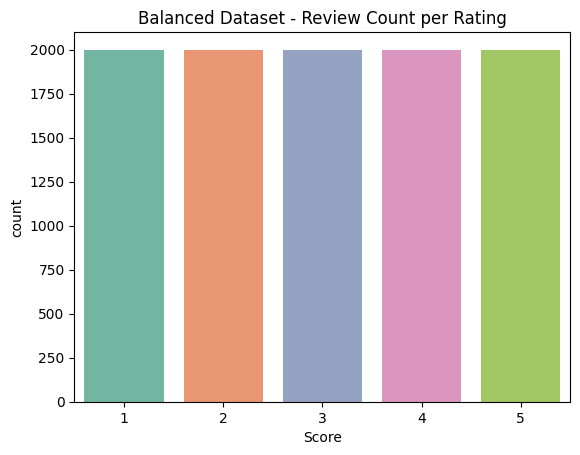

In [15]:
plt.figure()
sns.countplot(x="Score", data=balanced_df, palette="Set2")
plt.title("Balanced Dataset - Review Count per Rating")
plt.show()

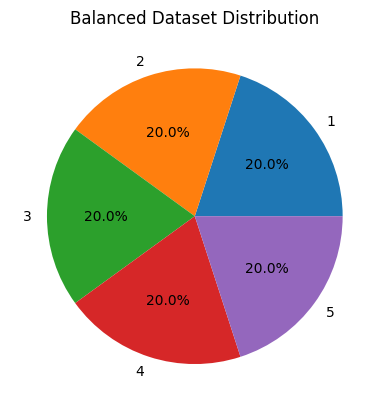

In [16]:
plt.figure()
balanced_df["Score"].value_counts().sort_index().plot.pie(autopct="%1.1f%%", ylabel="", title="Balanced Dataset Distribution")
plt.show()

# **IMBALANCED DATASET**

In [17]:
# Remove the balanced rows from the pool to keep datasets disjoint
remaining = pool.drop(balanced_df.index, errors="ignore").reset_index(drop=True)
print("\nRemaining pool shape (after removing balanced samples):", remaining.shape)


Remaining pool shape (after removing balanced samples): (748323, 3)


In [18]:
# desired distribution
distribution = {1: 0.10, 2: 0.15, 3: 0.25, 4: 0.30, 5: 0.20}
total_size = 10000  # you can change this, but ensure enough data in remaining pool

# compute counts and sample
imbalanced_parts = []
for score, frac in distribution.items():
    n = int(total_size * frac)
    available = remaining[remaining["Score"] == score]
    n_use = min(n, len(available))
    sampled = available.sample(n=n_use, random_state=SEED)
    imbalanced_parts.append(sampled)
    print(f"Score {score}: requested {n}, available {len(available)}, sampled {n_use}")

imbalanced_df = pd.concat(imbalanced_parts).reset_index(drop=True)
print("Imbalanced dataset shape:", imbalanced_df.shape)
print("Imbalanced distribution (counts):")
print(imbalanced_df["Score"].value_counts().sort_index())

Score 1: requested 1000, available 70943, sampled 1000
Score 2: requested 1500, available 35413, sampled 1500
Score 3: requested 2500, available 57459, sampled 2500
Score 4: requested 3000, available 118875, sampled 3000
Score 5: requested 2000, available 465633, sampled 2000
Imbalanced dataset shape: (10000, 3)
Imbalanced distribution (counts):
Score
1    1000
2    1500
3    2500
4    3000
5    2000
Name: count, dtype: int64


In [19]:
imbalanced_df.to_csv("/content/imbalanced_reviews.csv", index=False)


### **Visualization for Imbalanced Dataset**

/tmp/ipython-input-1021379595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Score", data=imbalanced_df, palette="Set1")


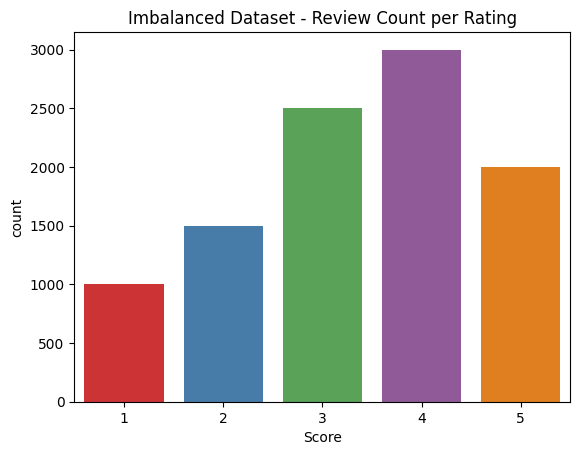

In [20]:
plt.figure()
sns.countplot(x="Score", data=imbalanced_df, palette="Set1")
plt.title("Imbalanced Dataset - Review Count per Rating")
plt.show()


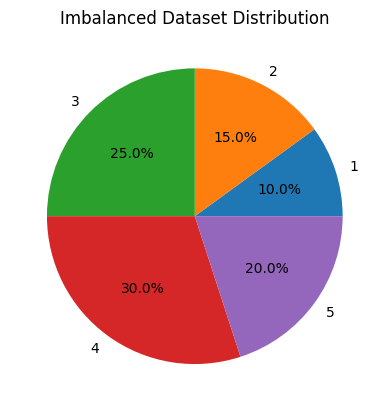

In [21]:
plt.figure()
imbalanced_df["Score"].value_counts().sort_index().plot.pie(autopct="%1.1f%%", ylabel="", title="Imbalanced Dataset Distribution")
plt.show()

# **DATA PREPROCESSING**

**For Balanced Dataset**

In [22]:
df = balanced_df.copy()

In [23]:

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
# Remove duplicates
df.drop_duplicates(subset=["Text", "Summary"], inplace=True)
print("After duplicates removal:", df.shape)

After duplicates removal: (9457, 3)


In [25]:
# Remove conflicting reviews (resolve by majority vote)
# Conflicting reviews: same Text with different Scores
conflict_counts = df.groupby("Text")["Score"].nunique()
conflicting_texts = conflict_counts[conflict_counts > 1].index

print(f"Conflicting reviews found: {len(conflicting_texts)}")

# Resolve by majority vote (if tie, take max Score)
def resolve_score(group):
    counts = group.value_counts()
    max_count = counts.max()
    top_scores = counts[counts == max_count].index
    return top_scores.max()  # pick max if tie

for text in conflicting_texts:
    mask = df["Text"] == text
    df.loc[mask, "Score"] = resolve_score(df.loc[mask, "Score"])

Conflicting reviews found: 82


In [26]:
# Handling missing values
# ============================
# For Text/Summary, fill missing with empty string
df["Text"] = df["Text"].fillna("").astype(str)
df["Summary"] = df["Summary"].fillna("").astype(str)

# Drop rows with missing Score
df.dropna(subset=["Score"], inplace=True)

In [27]:
# 4. Dropping unnecessary columns
# ============================
# Keep only Text and Score for modeling
df = df[["Text", "Score"]]

In [28]:
# 5. Text lowercasing
# ============================
df["Text"] = df["Text"].str.lower()

In [29]:
# 6. Removing URLs
# ============================
df["Text"] = df["Text"].str.replace(r"http\S+|www\S+|https\S+", "", regex=True)


In [30]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 8.3 MB/s eta 0:00:00


In [31]:
#  Removing emojis & special characters
# ============================
import emoji
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

df["Text"] = df["Text"].apply(remove_emoji)

# Optional: remove non-ASCII characters
df["Text"] = df["Text"].str.encode("ascii", "ignore").str.decode("ascii")

In [32]:
#  Removing punctuations
# ============================
df["Text"] = df["Text"].str.translate(str.maketrans("", "", string.punctuation))


In [33]:
#  Stopword removal
# ============================
stop_words = set(stopwords.words("english"))
df["Text"] = df["Text"].apply(lambda x: " ".join([w for w in x.split() if w not in stop_words]))


In [34]:
# Print the number of stopwords and the stopwords themselves
print("Number of stopwords:", len(stop_words))
print("\nStopwords:", stop_words)

Number of stopwords: 198

Stopwords: {'ain', 'same', 'after', 'she', 'was', 't', 'from', "we'd", 'most', 'because', 'other', 'now', 'we', "it'd", 'am', 'both', 'been', 'out', 'being', 'some', 'up', 'them', 'your', 'then', 'yours', 'below', 'here', 'with', 'itself', 'will', "that'll", "wouldn't", 'but', 'should', 'each', 'did', 'mightn', "i'm", 'are', "you'll", 'his', 're', 'again', 'own', "she'll", "she'd", 'i', 'didn', 'ours', 'all', "i'll", 'mustn', "she's", 'which', 'by', 'theirs', "shan't", 'the', "mightn't", 'their', 'a', "hasn't", 'has', "you've", "he'll", "you're", "he's", "should've", 'too', 'do', 'more', "mustn't", 'there', 'don', "haven't", 'shan', 'nor', 'as', 'above', "aren't", "you'd", "hadn't", "isn't", 'they', "didn't", 'it', 'about', 'having', 'just', 'any', 'at', 'ourselves', 'how', 'm', 'over', "it's", 'into', "they've", 'those', 'you', 'o', "we'll", 'herself', 'himself', 'her', 'until', 'very', 'if', 'before', "i've", 'between', 'only', "wasn't", "needn't", 'him', 'd

In [35]:
# Lemmatization
# ============================
lemmatizer = WordNetLemmatizer()
df["Text"] = df["Text"].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in x.split()]))


In [36]:

#  Filtering by word counts
# Calculate word counts
df["word_count"] = df["Text"].str.split().apply(len)

# Filter reviews by word count
df = df[(df["word_count"] >= 3) & (df["word_count"] <= 100)].copy()

print("After filtering by word count:", df.shape)

After filtering by word count: (7850, 3)


# **DATA VISUALIZATION**

In [37]:
# Compute word counts
df["word_count"] = df["Text"].apply(lambda x: len(x.split()))
print(df["word_count"].describe())

count    7850.000000
mean       31.195669
std        22.526013
min         3.000000
25%        14.000000
50%        25.000000
75%        44.000000
max       100.000000
Name: word_count, dtype: float64


/tmp/ipython-input-4173881552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Score", y="word_count", data=df, palette="Set3")


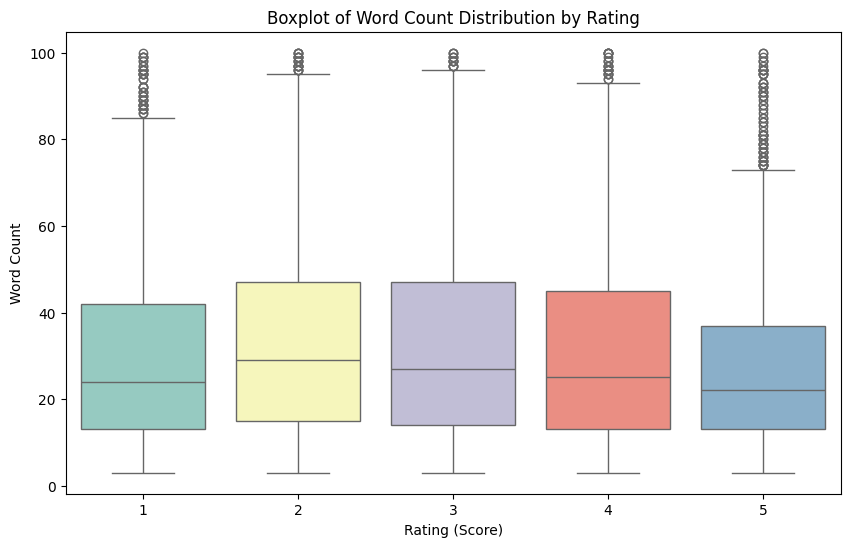

In [38]:
#  Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Score", y="word_count", data=df, palette="Set3")
plt.title("Boxplot of Word Count Distribution by Rating")
plt.xlabel("Rating (Score)")
plt.ylabel("Word Count")
plt.show()

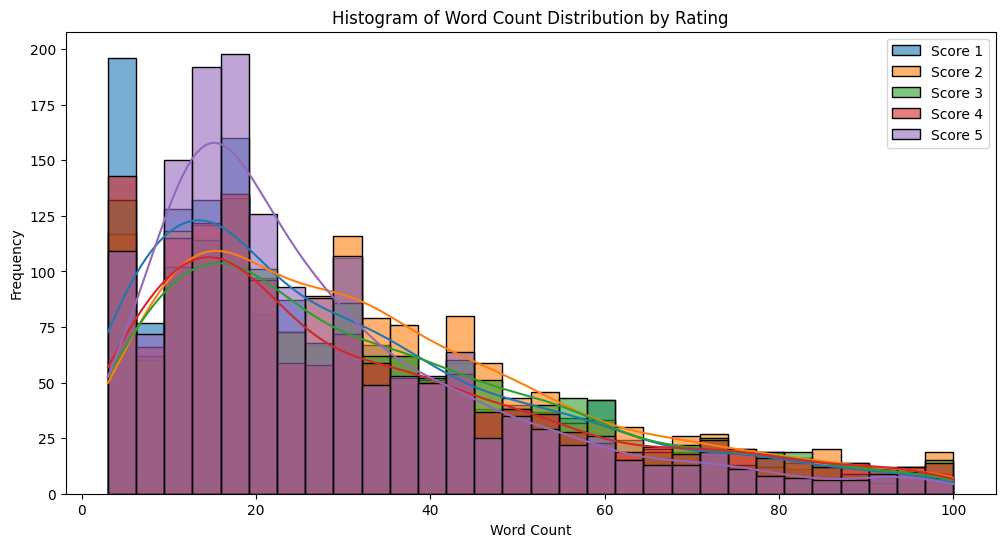

In [39]:
#  Histogram
plt.figure(figsize=(12, 6))
for score in sorted(df["Score"].unique()):
    subset = df[df["Score"] == score]
    sns.histplot(subset["word_count"], bins=30, label=f"Score {score}", kde=True, alpha=0.6)
plt.title("Histogram of Word Count Distribution by Rating")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()


/tmp/ipython-input-535437343.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Score", y="word_count", data=total_word_count, palette="Set2")


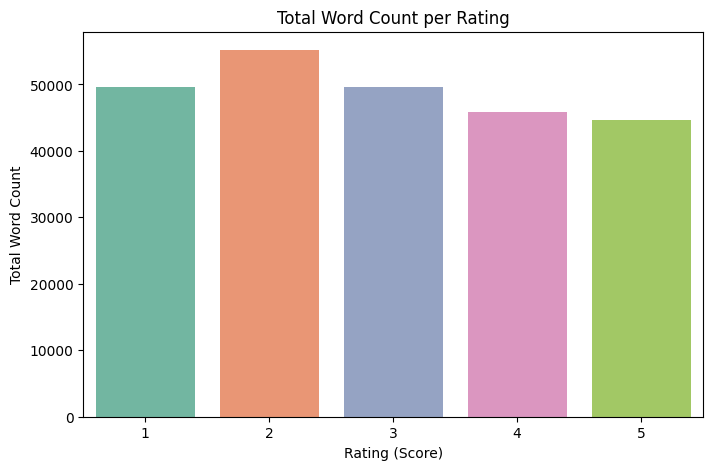

In [40]:
# Bar chart
# Calculate total word count per rating
total_word_count = df.groupby("Score")["word_count"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="Score", y="word_count", data=total_word_count, palette="Set2")
plt.title("Total Word Count per Rating")
plt.xlabel("Rating (Score)")
plt.ylabel("Total Word Count")
plt.show()

## **Sample Reviews**

In [41]:
num_samples = 5  # number of reviews per rating

for score in sorted(df["Score"].unique()):
    print(f"\n{'='*10} Rating: {score} {'='*10}\n")
    sample_reviews = df[df["Score"] == score]["Text"].sample(n=min(num_samples, len(df[df["Score"] == score])), random_state=SEED)
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review}\n")


========== Rating: 1 ==========

1. ive never allergic reaction food anything else life within 20 second starting chew piece gum throat began burn airway became constricted thats strange ive chewing spearmint peppermint ice cube reaction tasted another piece another pack get stuff free dining facility iraq throat started burning history food allergy might want try flavor

2. product 6 size oversized worst experience

3. pack 8 campell soup listed 5100 regular lolwhat grocery store sell price must kidding right sale buy store little 100 sale even less bogus pricesbogusprices grocery site

4. pure bred rottweiler love eat seen amazon although review price right figured would try never dog wouldnt even swallow kibble mouth spit left food bowl day watching see food possibly heat eating food replaced another kind like quickly ate would recommend food even non picky dog

5. although zico may claim natural disagree since made concentrate prefer drink vita coco much flavorful brand coconut wa

# **TRAIN-TEST SPLIT**

**For Balanced Dataset**

In [42]:
from sklearn.model_selection import train_test_split


In [43]:

# Features and target
X = df["Text"]  # input text
y = df["Score"]  # target rating

# Perform split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

# Print shapes
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (6280,) (6280,)
Test set: (1570,) (1570,)


# **VECTORIZATION**

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [45]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,       # limit vocabulary size
    ngram_range=(1, 2),      # unigrams + bigrams
    stop_words="english"     # remove stopwords
)

# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Print shapes
print("TF-IDF Shapes:")
print("X_train:", X_train_tfidf.shape)
print("X_test:", X_test_tfidf.shape)

TF-IDF Shapes:
X_train: (6280, 5000)
X_test: (1570, 5000)


# **DATA PREPROCESSING**

### **For Imbalanced Dataset**

In [46]:
dfi = imbalanced_df.copy()
print("Initial shape:", dfi.shape)

Initial shape: (10000, 3)


In [47]:
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [48]:
# 1. Remove duplicates
dfi.drop_duplicates(subset=["Text", "Summary"], inplace=True)

In [49]:
# Remove conflicting reviews (resolve by majority vote)
# Conflicting reviews: same Text with different Scores
conflict_counts_i = dfi.groupby("Text")["Score"].nunique()
conflicting_texts_i = conflict_counts_i[conflict_counts_i > 1].index

print(f"Conflicting reviews found in imbalanced dataset: {len(conflicting_texts_i)}")

# Resolve by majority vote (if tie, take max Score)
def resolve_score_i(group):
    counts = group.value_counts()
    max_count = counts.max()
    top_scores = counts[counts == max_count].index
    return top_scores.max()  # pick max if tie

for text in conflicting_texts_i:
    mask_i = dfi["Text"] == text
    dfi.loc[mask_i, "Score"] = resolve_score_i(dfi.loc[mask_i, "Score"])

Conflicting reviews found in imbalanced dataset: 77


In [50]:
# 2. Handle missing values
dfi["Text"] = dfi["Text"].fillna("").astype(str)
dfi["Summary"] = dfi["Summary"].fillna("").astype(str)
dfi.dropna(subset=["Score"], inplace=True)

In [51]:
# 3. Drop unnecessary columns
dfi = dfi[["Text", "Score"]]

In [52]:
# 4. Lowercase
dfi["Text"] = dfi["Text"].str.lower()

In [53]:
# 5. Remove URLs
dfi["Text"] = dfi["Text"].str.replace(r"http\S+|www\S+|https\S+", "", regex=True)


In [54]:
# 6. Remove emojis & special characters
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')
dfi["Text"] = dfi["Text"].apply(remove_emoji)
dfi["Text"] = dfi["Text"].str.encode("ascii", "ignore").str.decode("ascii")


In [55]:
# 7. Remove punctuation
import string
dfi["Text"] = dfi["Text"].str.translate(str.maketrans("", "", string.punctuation))


In [56]:
# 8. Stopword removal
stop_words = set(stopwords.words("english"))
dfi["Text"] = dfi["Text"].apply(lambda x: " ".join([w for w in x.split() if w not in stop_words]))


In [57]:
# Print the number of stopwords and the stopwords themselves
print("Number of stopwords:", len(stop_words))
print("\nStopwords:", stop_words)

Number of stopwords: 198

Stopwords: {'ain', 'same', 'after', 'she', 'was', 't', 'from', "we'd", 'most', 'because', 'other', 'now', 'we', "it'd", 'am', 'both', 'been', 'out', 'being', 'some', 'up', 'them', 'your', 'then', 'yours', 'below', 'here', 'with', 'itself', 'will', "that'll", "wouldn't", 'but', 'should', 'each', 'did', 'mightn', "i'm", 'are', "you'll", 'his', 're', 'again', 'own', "she'll", "she'd", 'i', 'didn', 'ours', 'all', "i'll", 'mustn', "she's", 'which', 'by', 'theirs', "shan't", 'the', "mightn't", 'their', 'a', "hasn't", 'has', "you've", "he'll", "you're", "he's", "should've", 'too', 'do', 'more', "mustn't", 'there', 'don', "haven't", 'shan', 'nor', 'as', 'above', "aren't", "you'd", "hadn't", "isn't", 'they', "didn't", 'it', 'about', 'having', 'just', 'any', 'at', 'ourselves', 'how', 'm', 'over', "it's", 'into', "they've", 'those', 'you', 'o', "we'll", 'herself', 'himself', 'her', 'until', 'very', 'if', 'before', "i've", 'between', 'only', "wasn't", "needn't", 'him', 'd

In [58]:
# 9. Lemmatization
lemmatizer = WordNetLemmatizer()
dfi["Text"] = dfi["Text"].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in x.split()]))


In [59]:
# 10. Filtering by word counts
# Calculate word counts
dfi["word_count"] = dfi["Text"].str.split().apply(len)

# Filter reviews by word count
dfi = dfi[(dfi["word_count"] >= 3) & (dfi["word_count"] <= 100)].copy()

print("After filtering by word count:", dfi.shape)

After filtering by word count: (7676, 3)


# **DATA VISUALIZATION**

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Ensure word counts are available
if "word_count" not in dfi.columns:
    dfi["word_count"] = dfi["Text"].str.split().apply(len)


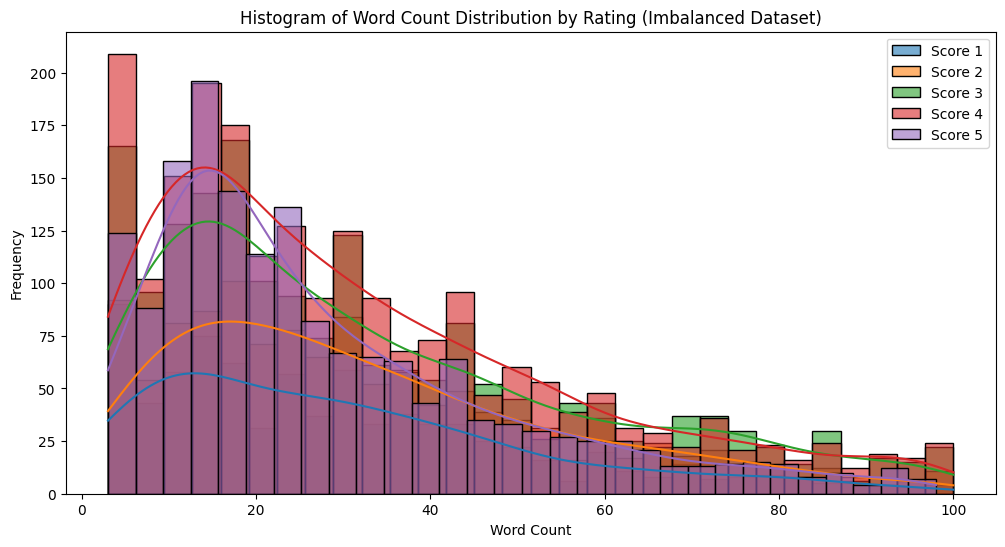

In [62]:
plt.figure(figsize=(12, 6))
for score in sorted(dfi["Score"].unique()):
    subset = dfi[dfi["Score"] == score]
    sns.histplot(subset["word_count"], bins=30, label=f"Score {score}", kde=True, alpha=0.6)
plt.title("Histogram of Word Count Distribution by Rating (Imbalanced Dataset)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/tmp/ipython-input-3744782776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Score", y="word_count", data=dfi, palette="Set3")


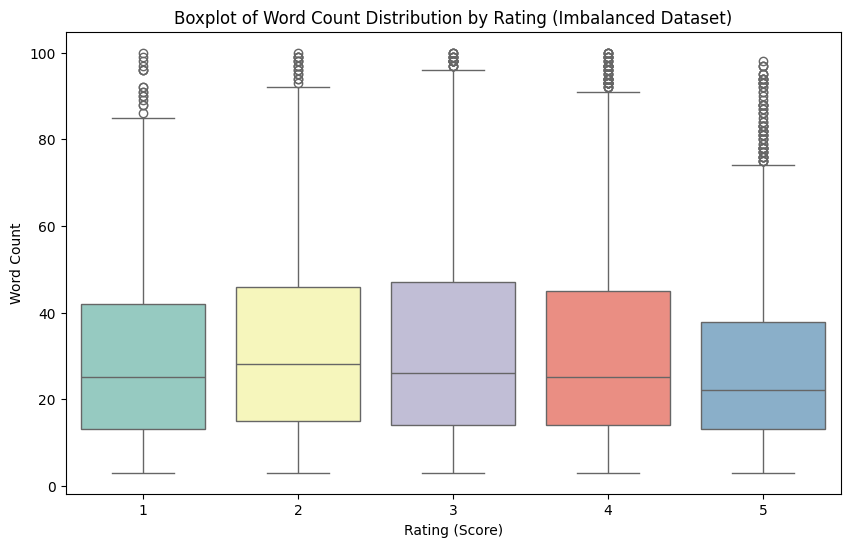

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Score", y="word_count", data=dfi, palette="Set3")
plt.title("Boxplot of Word Count Distribution by Rating (Imbalanced Dataset)")
plt.xlabel("Rating (Score)")
plt.ylabel("Word Count")
plt.show()

/tmp/ipython-input-2376561531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Score", y="word_count", data=total_word_count_i, palette="Set2")


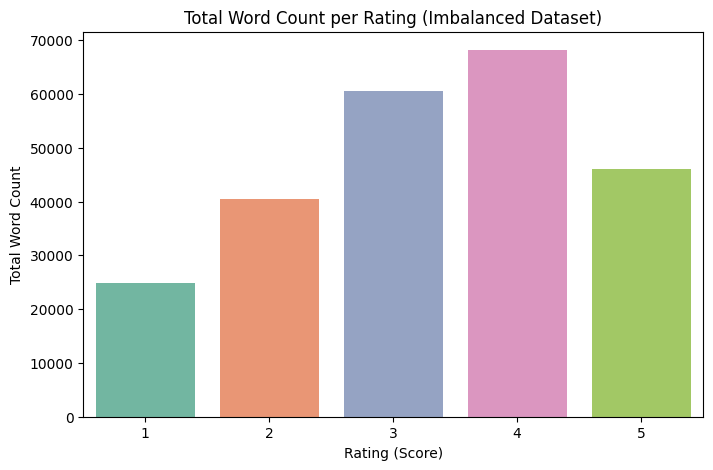

In [64]:
# Calculate total word count per rating for imbalanced dataset
total_word_count_i = dfi.groupby("Score")["word_count"].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="Score", y="word_count", data=total_word_count_i, palette="Set2")
plt.title("Total Word Count per Rating (Imbalanced Dataset)")
plt.xlabel("Rating (Score)")
plt.ylabel("Total Word Count")
plt.show()

In [65]:
num_samples = 5  # number of reviews per rating

for score in sorted(dfi["Score"].unique()):
    print(f"\n{'='*10} Rating: {score} {'='*10}\n")
    sample_reviews = dfi[dfi["Score"] == score]["Text"].sample(n=min(num_samples, len(dfi[dfi["Score"] == score])), random_state=SEED)
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review}\n")


========== Rating: 1 ==========

1. bad product sad buy product product quality

2. worst garbage ive ever boughten horrible hamburger helper imitation almost double price stick hamburger helper youll happier

3. damage 2 daysnot running goodbut looking good

4. product working turn indicator light need keep rotating container look like issue product also doesnt look like brand

5. pls dont buy good hard tennis ball handle craked


========== Rating: 2 ==========

1. received wrong product instead vanilla flavored got original im canceling subscription fine service

2. grow tired product claim healthy whenever bar exception put ingredient like oatmeal walnut raisin food certainly give illusion youre consuming something healthy right look ingredient list nutritional info oat raisin walnut spice bar reality hit square eyeballsthis good although one tiny bar contains 100 calorie mostly carbohydrate spike blood sugar insulin level thats good body youre attempting eat healthy suppose produ

# **TRAIN-TEST SPLIT**

**For Imbalanced Dataset**

In [66]:
from sklearn.model_selection import train_test_split

X_i = dfi["Text"]
y_i = dfi["Score"]

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_i, y_i, test_size=0.2, random_state=SEED, stratify=y_i
)

print("Training set:", X_train_i.shape, y_train_i.shape)
print("Test set:", X_test_i.shape, y_test_i.shape)

Training set: (6140,) (6140,)
Test set: (1536,) (1536,)


# **VECTORIZATION**

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_i = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words="english"
)

X_train_i_tfidf = tfidf_i.fit_transform(X_train_i)
X_test_i_tfidf = tfidf_i.transform(X_test_i)

print("TF-IDF Shapes:")
print("X_train_i:", X_train_i_tfidf.shape)
print("X_test_i:", X_test_i_tfidf.shape)

TF-IDF Shapes:
X_train_i: (6140, 5000)
X_test_i: (1536, 5000)


# **MODEL TRAINING & EVALUATION**

**For Balanced Dataset**

In [68]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# common function for visualization
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### **LOGISTIC REGRESSION**

In [70]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)

# Ensure the target variable is numeric
y_train = y_train.astype(int)
y_test = y_test.astype(int)

lr.fit(X_train_tfidf, y_train) # Fit on TF-IDF transformed data

y_pred_lr = lr.predict(X_test_tfidf) # Predict on TF-IDF transformed data

print("\n📊 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


📊 Logistic Regression Results:
Accuracy: 0.43312101910828027
Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.64      0.57       329
           2       0.35      0.36      0.36       329
           3       0.36      0.27      0.31       302
           4       0.36      0.32      0.34       288
           5       0.51      0.56      0.53       322

    accuracy                           0.43      1570
   macro avg       0.42      0.43      0.42      1570
weighted avg       0.42      0.43      0.43      1570



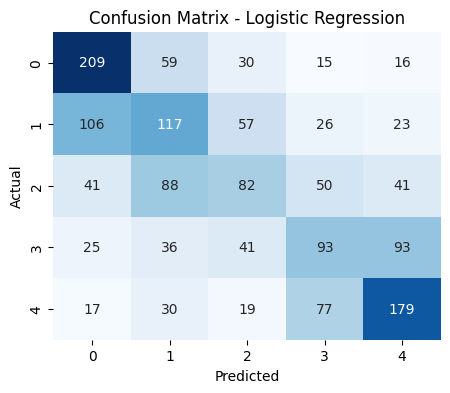

In [71]:
# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

**Observations**:

*  Class 0: Predicted quite accurately; strong diagonal counts.

*  Classes 1 & 2: Noticeable confusion with adjacent classes (1↔0/2, 2↔1/3).


*   Class 3: Often pushed to class 4.

*   Class 4: Good correctness; most errors go to class 3.



**Inference**:

Strong on extremes (0 and 4), struggles with mid classes due to overlapping language cues. The linear boundary likely underfits subtle sentiment gradations.

### **RANDOM FOREST**

In [72]:
rf = RandomForestClassifier(n_estimators=200, random_state=SEED)
rf.fit(X_train_tfidf, y_train) # Fit on TF-IDF transformed data

y_pred_rf = rf.predict(X_test_tfidf) # Predict on TF-IDF transformed data

print("\n📊 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


📊 Random Forest Results:
Accuracy: 0.4210191082802548
Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.60      0.54       329
           2       0.32      0.33      0.32       329
           3       0.39      0.23      0.29       302
           4       0.41      0.25      0.31       288
           5       0.46      0.66      0.54       322

    accuracy                           0.42      1570
   macro avg       0.41      0.41      0.40      1570
weighted avg       0.41      0.42      0.40      1570



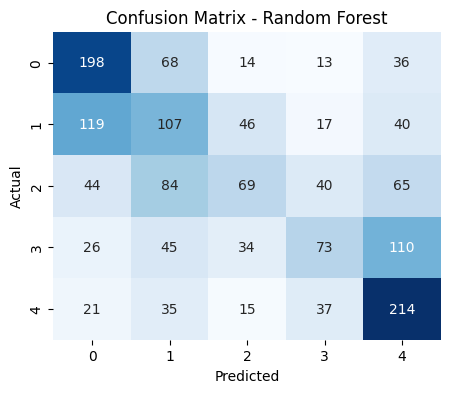

In [73]:
# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

**Observations**:


*   Class 0 and 4: Better-than-average correctness; distinct diagonal cells.

*   Class 1: Leaks into 0 and 2; some overprediction of 0.

*   Class 2: Broad confusion with 1 and 3; few confident 2s.

*   Class 3: Frequently elevated to 4.

**Inference**:

Nonlinear splits help extremes but don’t resolve mid-class ambiguity. Trees may overfit token-level quirks, yielding adjacent mislabels instead of crisp class 2/3 separations.

**SUPPORT VECTOR MACHINE (SVM)**

In [74]:
svm = SVC(kernel='linear', probability=True, random_state=SEED)
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("\n📊 SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


📊 SVM Results:
Accuracy: 0.4299363057324841
Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.62      0.58       329
           2       0.36      0.36      0.36       329
           3       0.34      0.30      0.32       302
           4       0.38      0.36      0.37       288
           5       0.50      0.49      0.49       322

    accuracy                           0.43      1570
   macro avg       0.42      0.43      0.42      1570
weighted avg       0.42      0.43      0.43      1570



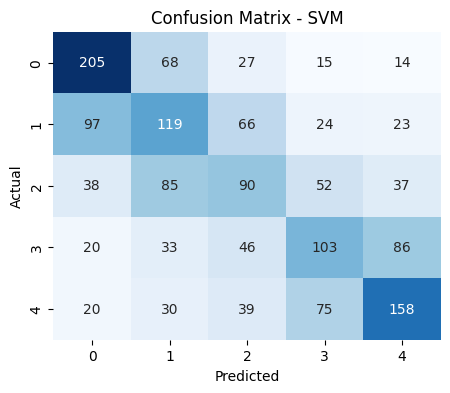

In [75]:
# Confusion Matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

**Observations**:

*   Class 0 and 4: Clear diagonal dominance; many correct predictions.

*   Class 1: Split across 0 and 2; fewer clean hits.


*   Class 2: Spread across 1, 2, and 3 (highest confusion among classes).

*   Class 3: Noticeable drift toward 4.


**Inference**:

Captures extremes well; middle classes remain entangled. Even with margins, feature overlap in TF–IDF space leads to adjacent-class swaps rather than random errors.

### **NAIVE BAYES**

In [76]:
# Initialize and train the model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluation
print("\n📊 Multinomial Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


📊 Multinomial Naive Bayes Results:
Accuracy: 0.44203821656050957
Classification Report:
               precision    recall  f1-score   support

           1       0.55      0.63      0.59       329
           2       0.38      0.47      0.42       329
           3       0.33      0.21      0.26       302
           4       0.38      0.25      0.31       288
           5       0.49      0.61      0.54       322

    accuracy                           0.44      1570
   macro avg       0.43      0.43      0.42      1570
weighted avg       0.43      0.44      0.43      1570



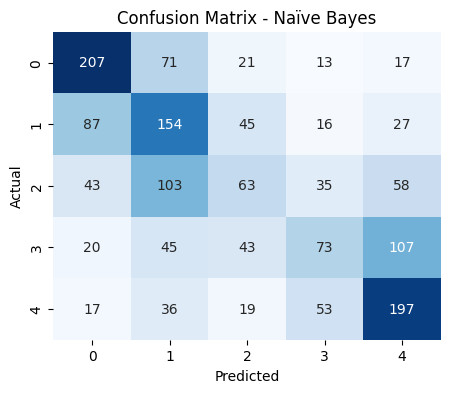

In [77]:
# Confusion Matrix Visualization
plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes")

**Observations**:


*   Class 1: Slightly stronger correctness vs. other models (more diagonal mass).

*  Class 0 and 4: Good diagonal counts; similar to others.

*   Class 2 and 3: Continued confusion, especially 3→4 and 2↔1/3.

**Inference**:

Probabilistic treatment of word counts gives a solid baseline, especially for clearly negative/positive language. Independence assumptions limit its ability to tease apart nuanced mid-scale sentiment.

**Comparison Summary**

In [78]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "Naïve Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_nb)
    ]
}


In [79]:
results_df = pd.DataFrame(results)
print("\n📈 Model Comparison Summary:\n", results_df)


📈 Model Comparison Summary:
                  Model  Accuracy
0  Logistic Regression  0.433121
1        Random Forest  0.421019
2                  SVM  0.429936
3          Naïve Bayes  0.442038


# **FINE**-**TUNING**

In [80]:
from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


**Logistic Regression**

In [81]:
param_dist_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [200, 500, 1000]
}

rand_lr = RandomizedSearchCV(
    LogisticRegression(random_state=SEED),
    param_distributions=param_dist_lr,
    n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=SEED
)
rand_lr.fit(X_train_tfidf, y_train)

best_lr = rand_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_tfidf)

print("Best Params (LR):", rand_lr.best_params_)
print("Test Accuracy:", best_lr.score(X_test_tfidf, y_test))
print("\n", classification_report(y_test, y_pred_lr))

Best Params (LR): {'solver': 'lbfgs', 'max_iter': 1000, 'C': 1}
Test Accuracy: 0.43312101910828027

               precision    recall  f1-score   support

           1       0.53      0.64      0.57       329
           2       0.35      0.36      0.36       329
           3       0.36      0.27      0.31       302
           4       0.36      0.32      0.34       288
           5       0.51      0.56      0.53       322

    accuracy                           0.43      1570
   macro avg       0.42      0.43      0.42      1570
weighted avg       0.42      0.43      0.43      1570



**SVM**

In [82]:
param_dist_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

rand_svm = RandomizedSearchCV(
    SVC(random_state=SEED),
    param_distributions=param_dist_svm,
    n_iter=4, cv=3, scoring='accuracy', n_jobs=-1, random_state=SEED
)
rand_svm.fit(X_train_tfidf, y_train)

best_svm = rand_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_tfidf)

print("Best Params (SVM):", rand_svm.best_params_)
print("Test Accuracy:", best_svm.score(X_test_tfidf, y_test))
print("\n", classification_report(y_test, y_pred_svm))

Best Params (SVM): {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Test Accuracy: 0.4229299363057325

               precision    recall  f1-score   support

           1       0.53      0.60      0.56       329
           2       0.35      0.37      0.36       329
           3       0.32      0.27      0.29       302
           4       0.36      0.34      0.35       288
           5       0.51      0.52      0.51       322

    accuracy                           0.42      1570
   macro avg       0.41      0.42      0.42      1570
weighted avg       0.42      0.42      0.42      1570



**Random Forest**

In [85]:
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rand_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=SEED),
    param_distributions=param_dist_rf,
    n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=SEED
)
rand_rf.fit(X_train_tfidf, y_train)

best_rf = rand_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_tfidf)

print("Best Params (RF):", rand_rf.best_params_)
print("Test Accuracy:", best_rf.score(X_test_tfidf, y_test))
print("\n", classification_report(y_test, y_pred_rf))

Best Params (RF): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Test Accuracy: 0.4171974522292994

               precision    recall  f1-score   support

           1       0.47      0.67      0.55       329
           2       0.31      0.38      0.34       329
           3       0.35      0.12      0.17       302
           4       0.42      0.22      0.28       288
           5       0.48      0.66      0.56       322

    accuracy                           0.42      1570
   macro avg       0.40      0.41      0.38      1570
weighted avg       0.40      0.42      0.39      1570



**Naive Bayes**

In [83]:
param_dist_nb = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]}

rand_nb = RandomizedSearchCV(
    MultinomialNB(),
    param_distributions=param_dist_nb,
    n_iter=5, cv=3, scoring='accuracy', n_jobs=-1, random_state=SEED
)
rand_nb.fit(X_train_tfidf, y_train)

best_nb = rand_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test_tfidf)

print("Best Params (NB):", rand_nb.best_params_)
print("Test Accuracy:", best_nb.score(X_test_tfidf, y_test))
print("\n", classification_report(y_test, y_pred_nb))

Best Params (NB): {'alpha': 2.0}
Test Accuracy: 0.4356687898089172

               precision    recall  f1-score   support

           1       0.55      0.61      0.58       329
           2       0.37      0.52      0.43       329
           3       0.36      0.18      0.24       302
           4       0.36      0.19      0.25       288
           5       0.48      0.63      0.54       322

    accuracy                           0.44      1570
   macro avg       0.42      0.43      0.41      1570
weighted avg       0.42      0.44      0.41      1570



In [86]:
results = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Support Vector Machine",
        "Naive Bayes"
    ],
    "Best Parameters": [
        rand_lr.best_params_,
        rand_rf.best_params_,
        rand_svm.best_params_,
        rand_nb.best_params_
    ],
    "Test Accuracy": [
        best_lr.score(X_test_tfidf, y_test),
        best_rf.score(X_test_tfidf, y_test),
        best_svm.score(X_test_tfidf, y_test),
        best_nb.score(X_test_tfidf, y_test)
    ]
}

In [87]:
# Create a dataframe for visualization
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)
print("\n🔍 Model Performance Summary:\n")
display(results_df)


🔍 Model Performance Summary:



,Model,Best Parameters,Test Accuracy
0,Naive Bayes,{'alpha': 2.0},0.435669
1,Logistic Regression,"{'solver': 'lbfgs', 'max_iter': 1000, 'C': 1}",0.433121
2,Support Vector Machine,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}",0.422930
3,Random Forest,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.417197


# **MODEL TRAINING & EVALUATION**

**For Imbalanced Dataset**

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Helper function for confusion matrix visualization
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


**Logistic Regression**

In [92]:
lr_model = LogisticRegression(random_state=SEED, max_iter=1000)
lr_model.fit(X_train_i_tfidf, y_train_i)
lr_preds = lr_model.predict(X_test_i_tfidf)

print("📊 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_i, lr_preds))
print("Classification Report:\n", classification_report(y_test_i, lr_preds))

📊 Logistic Regression Results:
Accuracy: 0.4212239583333333
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.28      0.38       165
           2       0.38      0.21      0.27       246
           3       0.36      0.41      0.38       367
           4       0.40      0.54      0.46       428
           5       0.52      0.51      0.51       330

    accuracy                           0.42      1536
   macro avg       0.45      0.39      0.40      1536
weighted avg       0.43      0.42      0.41      1536



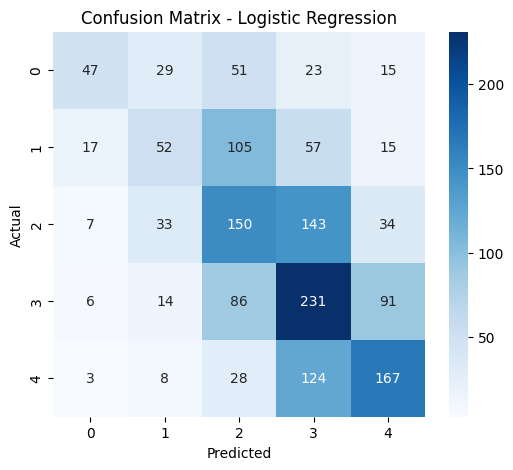

In [94]:
plot_conf_matrix(y_test_i, lr_preds, "Logistic Regression")


**Observations**:

*   The model shows a moderate concentration of correct predictions along the diagonal (especially for classes 3, 4, and 5).

*   However, there is noticeable class overlap — for instance, reviews of class 2 and 3 are often confused with each other.


*   Class 1 (low ratings) has a slightly better recall compared to mid-level ratings (2–3), indicating better discrimination of negative reviews.


**Inferences**:


*   Logistic Regression tends to perform reasonably when there’s linear separability between features, but struggles with non-linear review patterns.

*   The model can identify strong positive and negative sentiments but mixes up neutral or mid-range reviews, possibly because their textual tone overlaps.



📊 Random Forest Results:
Accuracy: 0.4153645833333333
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.27      0.38       165
           2       0.38      0.15      0.21       246
           3       0.36      0.40      0.38       367
           4       0.38      0.56      0.45       428
           5       0.51      0.52      0.52       330

    accuracy                           0.42      1536
   macro avg       0.45      0.38      0.39      1536
weighted avg       0.43      0.42      0.40      1536



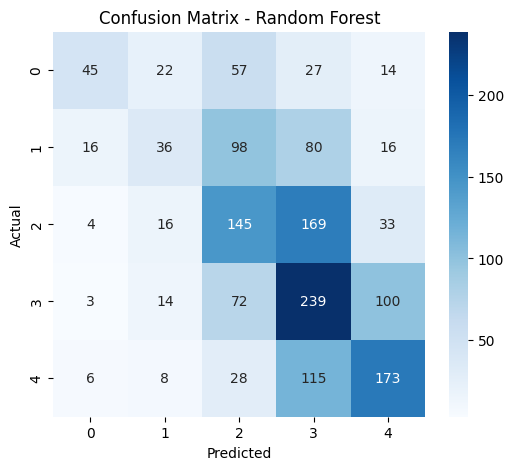

In [95]:
rf_model = RandomForestClassifier(random_state=SEED)
rf_model.fit(X_train_i_tfidf, y_train_i)
rf_preds = rf_model.predict(X_test_i_tfidf)

print("\n📊 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test_i, rf_preds))
print("Classification Report:\n", classification_report(y_test_i, rf_preds))
plot_conf_matrix(y_test_i, rf_preds, "Random Forest")

**Observations**:



*   Predictions are slightly more spread out across multiple classes compared to Logistic Regression.

*   The higher rating classes (3, 4, 5) dominate the correct classifications, showing that the model is more sensitive to frequent or majority classes.


*   Misclassifications between adjacent classes (e.g., 3↔4) are common, which suggests the boundaries between review sentiment intensities are not well separated.


**Inferences**:


*   Random Forest performs well in capturing non-linear relationships but might be biased toward more frequent classes in an imbalanced dataset.

*   It provides good robustness but lacks fine-grained discrimination across all review levels without balancing or tuning for class weights.



In [96]:
svm_model = SVC(random_state=SEED)
svm_model.fit(X_train_i_tfidf, y_train_i)
svm_preds = svm_model.predict(X_test_i_tfidf)

print("\n📊 SVM Results:")
print("Accuracy:", accuracy_score(y_test_i, svm_preds))
print("Classification Report:\n", classification_report(y_test_i, svm_preds))



📊 SVM Results:
Accuracy: 0.4212239583333333
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.19      0.30       165
           2       0.38      0.13      0.19       246
           3       0.34      0.44      0.38       367
           4       0.40      0.62      0.49       428
           5       0.58      0.48      0.52       330

    accuracy                           0.42      1536
   macro avg       0.49      0.37      0.38      1536
weighted avg       0.46      0.42      0.40      1536



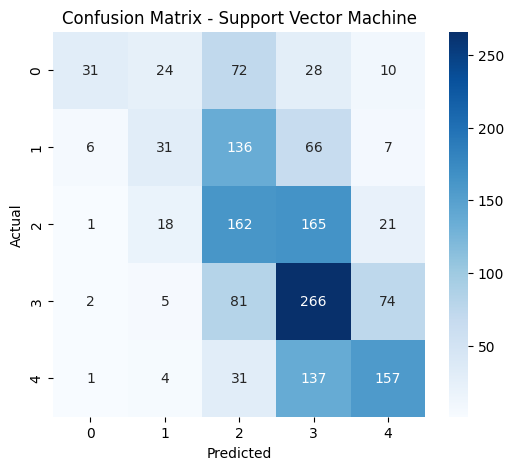

In [97]:
plot_conf_matrix(y_test_i, svm_preds, "Support Vector Machine")

**Observations**:


*   The SVM confusion matrix shows a clear diagonal trend, particularly strong for classes 3 and 4, indicating good precision for medium-to-high reviews.

*   Lower rating classes (1 and 2) are frequently misclassified as 3 — indicating that the decision boundary is too tight or overlaps in those regions.

*   Overall, SVM exhibits fewer scattered misclassifications than Random Forest.


**Inferences**:

*   SVM handles the non-linear separation in textual data better than Logistic Regression, especially with RBF kernel.

*   However, due to class imbalance, it leans toward majority sentiment classes (neutral-to-positive).



In [98]:
nb_model = MultinomialNB()
nb_model.fit(X_train_i_tfidf, y_train_i)
nb_preds = nb_model.predict(X_test_i_tfidf)

print("\n📊 Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test_i, nb_preds))
print("Classification Report:\n", classification_report(y_test_i, nb_preds))



📊 Naive Bayes Results:
Accuracy: 0.3841145833333333
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.08      0.14       165
           2       0.39      0.06      0.10       246
           3       0.34      0.40      0.37       367
           4       0.36      0.71      0.48       428
           5       0.53      0.34      0.42       330

    accuracy                           0.38      1536
   macro avg       0.49      0.32      0.30      1536
weighted avg       0.44      0.38      0.34      1536



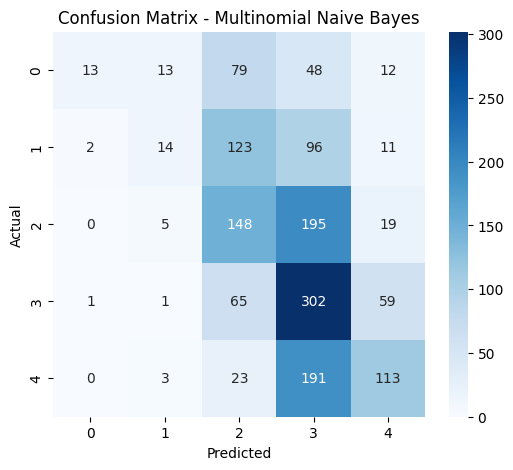

In [99]:
plot_conf_matrix(y_test_i, nb_preds, "Multinomial Naive Bayes")

**Observations**:


*   The largest diagonal is class 3, with substantial mass also on class 2 and class 4; classes 0 and 1 are rarely captured correctly.

*   Pronounced upward flow from 0–1 into 2–3; class 3 absorbs many borderline cases across classes.

*   Compared to others, the matrix is even more concentrated around class 3, amplifying majority influence.

**Inferences**:

Likelihoods favor frequent token patterns, reinforcing head classes; rare-class language is underweighted by default smoothing.

In [100]:
results_i = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "Naive Bayes"],
    "Test Accuracy": [
        accuracy_score(y_test_i, lr_preds),
        accuracy_score(y_test_i, rf_preds),
        accuracy_score(y_test_i, svm_preds),
        accuracy_score(y_test_i, nb_preds)
    ]
}

df_results_i = pd.DataFrame(results_i)
print("\n🔍 Model Performance Summary (Imbalanced Dataset):")
print(df_results_i)


🔍 Model Performance Summary (Imbalanced Dataset):
                 Model  Test Accuracy
0  Logistic Regression       0.421224
1        Random Forest       0.415365
2                  SVM       0.421224
3          Naive Bayes       0.384115


# **FINE-TUNING**

**For Imbalanced Dataset**

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# helper function for evaluation

def evaluate_model(model, X_test, y_test, model_name):
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n📊 {model_name} Results:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, preds))

    return acc

In [106]:
lr = LogisticRegression(random_state=SEED, max_iter=1000)
param_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

lr_search = RandomizedSearchCV(
    lr, param_distributions=param_lr, n_iter=5, cv=3,
    scoring='accuracy', random_state=SEED, n_jobs=-1
)
lr_search.fit(X_train_i_tfidf, y_train_i)

best_lr = lr_search.best_estimator_
acc_lr = evaluate_model(best_lr, X_test_i_tfidf, y_test_i, "Logistic Regression")
print("Best Parameters:", lr_search.best_params_)


📊 Logistic Regression Results:
Accuracy: 0.4244791666666667
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.29      0.39       165
           2       0.39      0.21      0.27       246
           3       0.36      0.42      0.39       367
           4       0.40      0.54      0.46       428
           5       0.52      0.51      0.51       330

    accuracy                           0.42      1536
   macro avg       0.45      0.39      0.41      1536
weighted avg       0.44      0.42      0.42      1536

Best Parameters: {'solver': 'saga', 'C': 1}


In [107]:
rf = RandomForestClassifier(random_state=SEED)
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    rf, param_distributions=param_rf, n_iter=10, cv=3,
    scoring='accuracy', random_state=SEED, n_jobs=-1
)
rf_search.fit(X_train_i_tfidf, y_train_i)

best_rf = rf_search.best_estimator_
acc_rf = evaluate_model(best_rf, X_test_i_tfidf, y_test_i, "Random Forest")
print("Best Parameters:", rf_search.best_params_)


📊 Random Forest Results:
Accuracy: 0.4153645833333333
Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.25      0.36       165
           2       0.45      0.15      0.22       246
           3       0.35      0.40      0.37       367
           4       0.38      0.58      0.46       428
           5       0.52      0.49      0.50       330

    accuracy                           0.42      1536
   macro avg       0.47      0.38      0.39      1536
weighted avg       0.44      0.42      0.40      1536

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [108]:
svm = SVC(random_state=SEED)
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_search = RandomizedSearchCV(
    svm, param_distributions=param_svm, n_iter=6, cv=3,
    scoring='accuracy', random_state=SEED, n_jobs=-1
)
svm_search.fit(X_train_i_tfidf, y_train_i)

best_svm = svm_search.best_estimator_
acc_svm = evaluate_model(best_svm, X_test_i_tfidf, y_test_i, "Support Vector Machine")
print("Best Parameters:", svm_search.best_params_)


📊 Support Vector Machine Results:
Accuracy: 0.412109375
Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.29      0.38       165
           2       0.37      0.29      0.32       246
           3       0.35      0.40      0.37       367
           4       0.39      0.49      0.43       428
           5       0.51      0.48      0.50       330

    accuracy                           0.41      1536
   macro avg       0.44      0.39      0.40      1536
weighted avg       0.42      0.41      0.41      1536

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [109]:
nb = MultinomialNB()
param_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

nb_search = RandomizedSearchCV(
    nb, param_distributions=param_nb, n_iter=5, cv=3,
    scoring='accuracy', random_state=SEED, n_jobs=-1
)
nb_search.fit(X_train_i_tfidf, y_train_i)

best_nb = nb_search.best_estimator_
acc_nb = evaluate_model(best_nb, X_test_i_tfidf, y_test_i, "Naive Bayes")
print("Best Parameters:", nb_search.best_params_)


📊 Naive Bayes Results:
Accuracy: 0.4075520833333333
Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.28      0.37       165
           2       0.33      0.19      0.24       246
           3       0.36      0.41      0.39       367
           4       0.39      0.54      0.45       428
           5       0.50      0.45      0.48       330

    accuracy                           0.41      1536
   macro avg       0.43      0.38      0.39      1536
weighted avg       0.42      0.41      0.40      1536

Best Parameters: {'alpha': 0.1}


In [110]:
results_i_tuned = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression", "Support Vector Machine", "Random Forest"],
    "Best Parameters": [
        nb_search.best_params_,
        lr_search.best_params_,
        svm_search.best_params_,
        rf_search.best_params_
    ],
    "Test Accuracy": [acc_nb, acc_lr, acc_svm, acc_rf]
})

print("\n🔍 Fine-Tuned Model Performance Summary (Imbalanced Dataset):")
print(results_i_tuned)


🔍 Fine-Tuned Model Performance Summary (Imbalanced Dataset):
                    Model                                    Best Parameters  \
0             Naive Bayes                                     {'alpha': 0.1}   
1     Logistic Regression                         {'solver': 'saga', 'C': 1}   
2  Support Vector Machine       {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}   
3           Random Forest  {'n_estimators': 100, 'min_samples_split': 10,...   

   Test Accuracy  
0       0.407552  
1       0.424479  
2       0.412109  
3       0.415365  
